In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

Параметры

In [37]:
num_samples = 20000
duration = 10
mean = 0
sd = 1

Белый шум (база)

In [38]:
time_axis = np.linspace(0, duration, num_samples)
white_noise = np.random.normal(mean, sd, num_samples)

Text(0, 0.5, 'Амплитуда')

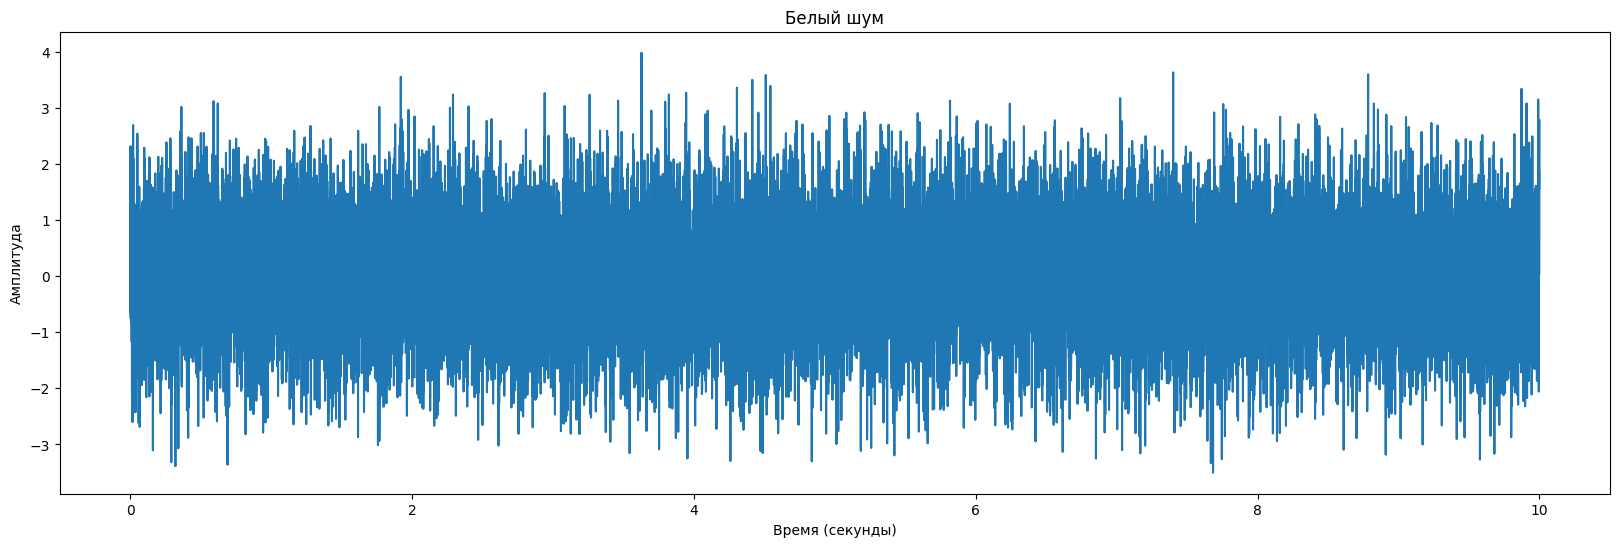

In [39]:
plt.figure(figsize=(20, 6))

plt.plot(time_axis, white_noise)

plt.title('Белый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')


Розовый шум

In [33]:
def gen_pink_noice(base_noice):
    rfft = np.fft.rfft(base_noice)
    freq = np.fft.rfftfreq(num_samples, 1.0 / num_samples) + 1
    return  np.fft.irfft(rfft / np.sqrt(freq))

In [34]:
pink_noise = gen_pink_noice(white_noise)

Text(212.72222222222223, 0.5, 'Амплитуда')

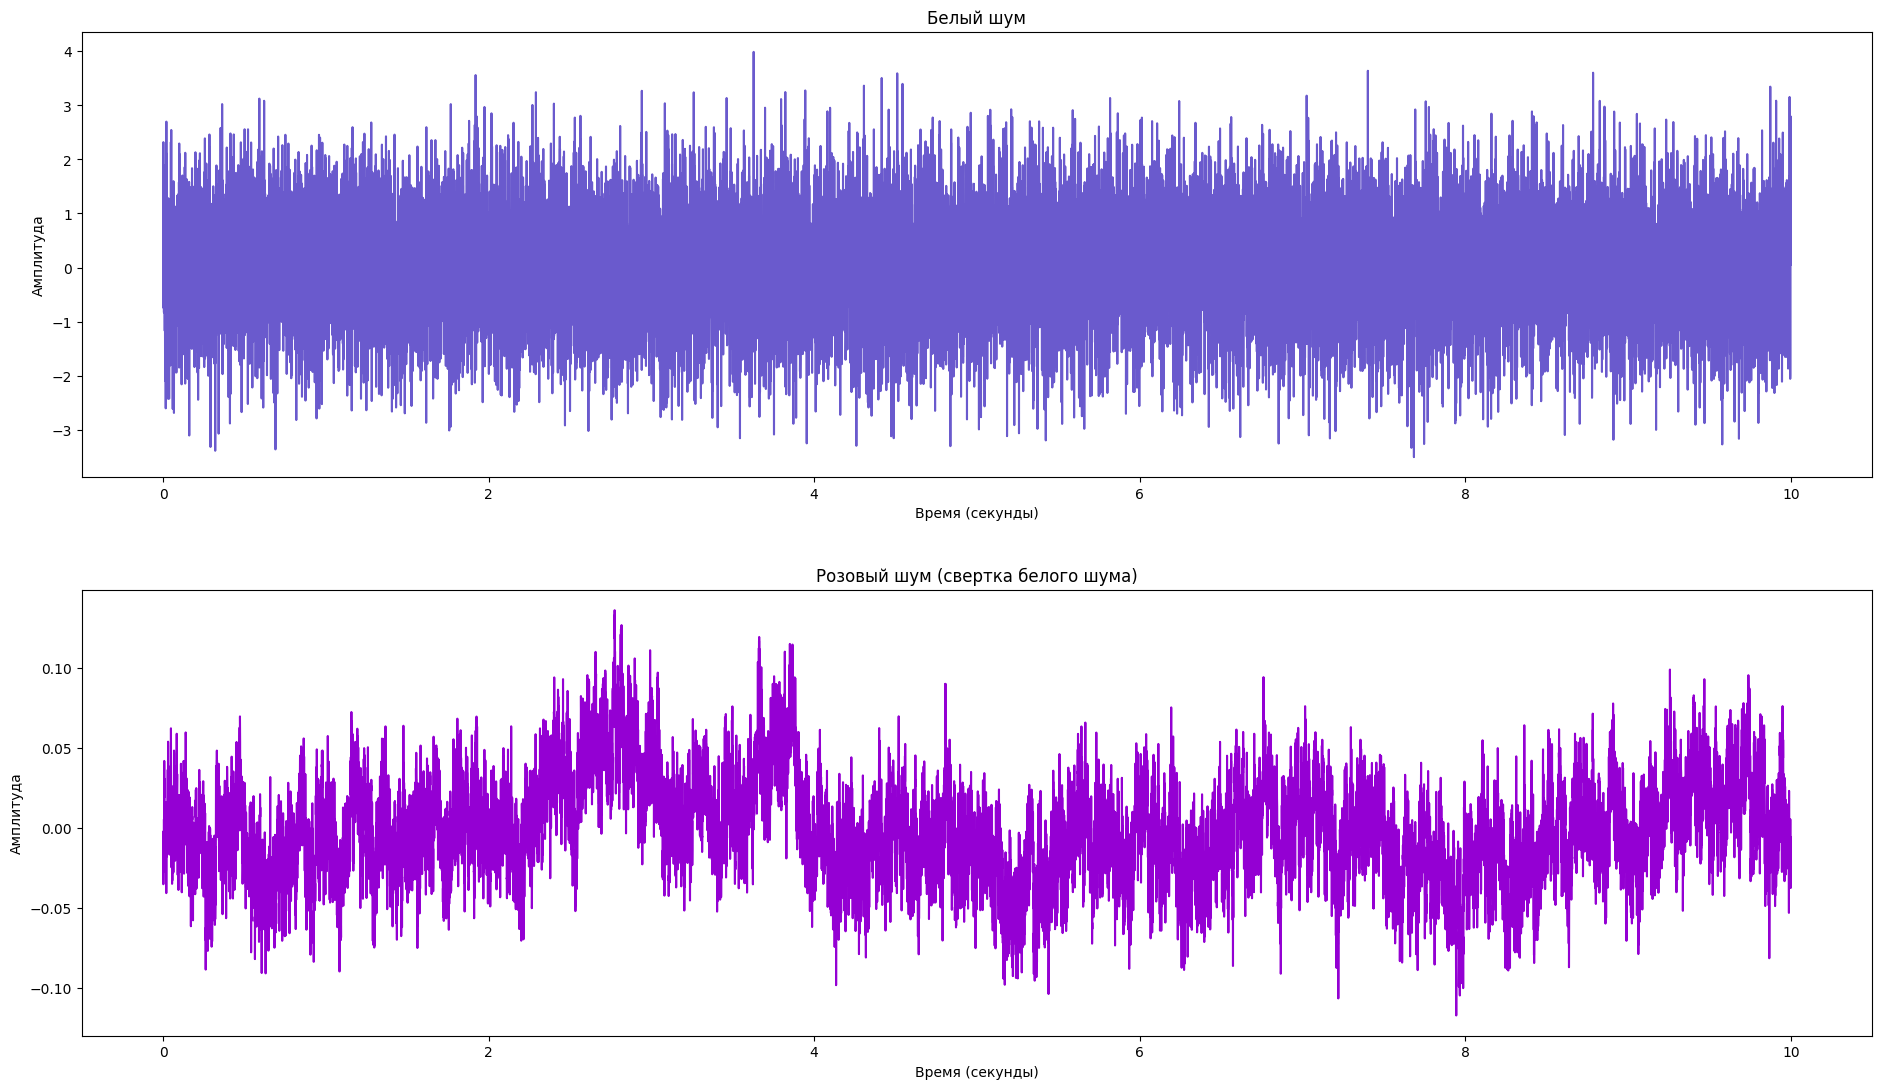

In [66]:
fig, axs = plt.subplots(2, 1, figsize=(20, 12))  
fig.tight_layout(pad=6) 

axs[0].plot(time_axis, white_noise, color='slateblue')
axs[0].set_title('Белый шум')
axs[0].set_xlabel('Время (секунды)')
axs[0].set_ylabel('Амплитуда')

axs[1].plot(time_axis, pink_noise, color='darkviolet')
axs[1].set_title('Розовый шум (свертка белого шума)')
axs[1].set_xlabel('Время (секунды)')
axs[1].set_ylabel('Амплитуда')

Чёрный шум

In [36]:
def getBlackNoiceFilter(f, T):
    kb =  scipy.constants.k
    h = scipy.constants.physical_constants['Planck constant'][0]
    c = scipy.constants.c
   
    G = 10

    coef1 = 2*h/(c*c*T*T*T)
    coef2 = h/(kb*T)

    filter = 10 * np.log(coef1*np.power(f, 3) / (np.exp(coef2*f)-1)) + G
    return filter

In [53]:
T = 17*10e-9
f = 1000

black_noise = white_noise + getBlackNoiceFilter(f, T)
black_noise /= np.max(np.abs(black_noise)) 

Text(199.22222222222223, 0.5, 'Амплитуда')

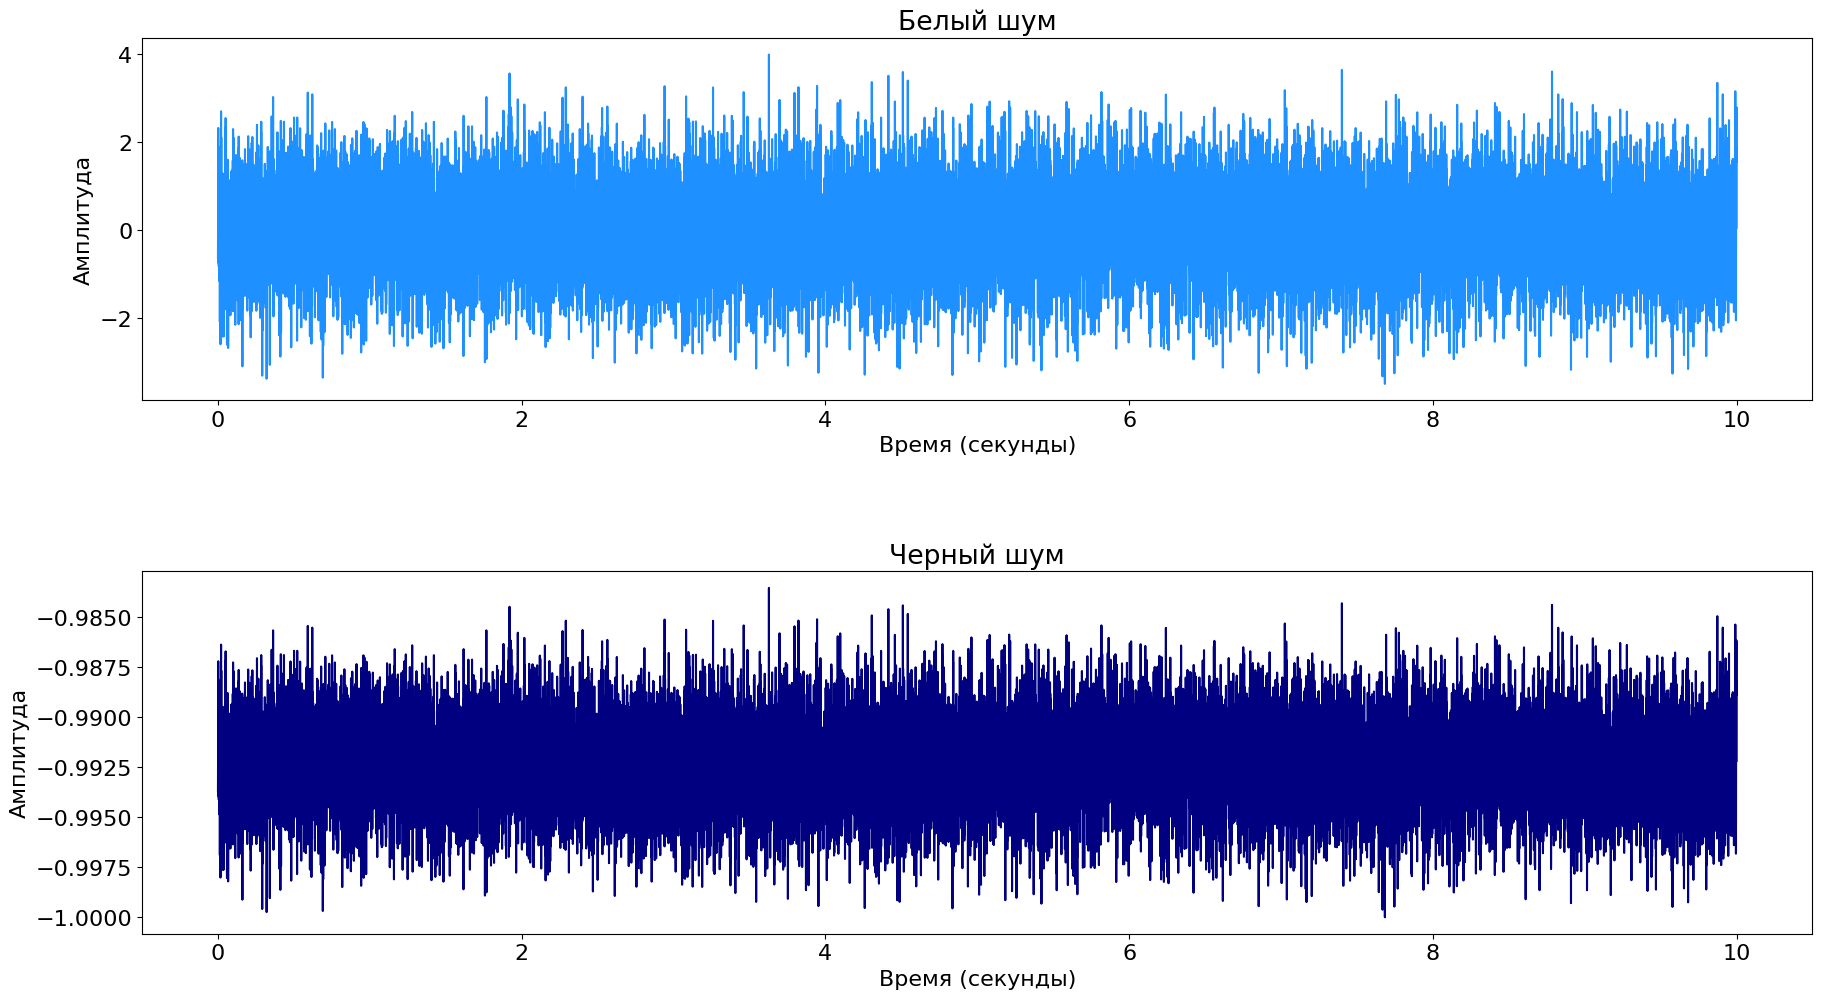

In [83]:
fig, axs = plt.subplots(2, 1, figsize=(20, 12)) 
fig.tight_layout(pad=6) 

axs[0].plot(time_axis, white_noise, color='dodgerblue')
axs[0].set_title('Белый шум')
axs[0].set_xlabel('Время (секунды)')
axs[0].set_ylabel('Амплитуда')

axs[1].plot(time_axis, black_noise, color='navy')
axs[1].set_title('Черный шум')
axs[1].set_xlabel('Время (секунды)')
axs[1].set_ylabel('Амплитуда')

In [79]:
clean_siglal = np.sin(time_axis*10) + np.cos(time_axis*5)

noiced_signal = white_noise + clean_siglal

Text(199.22222222222223, 0.5, 'Амплитуда')

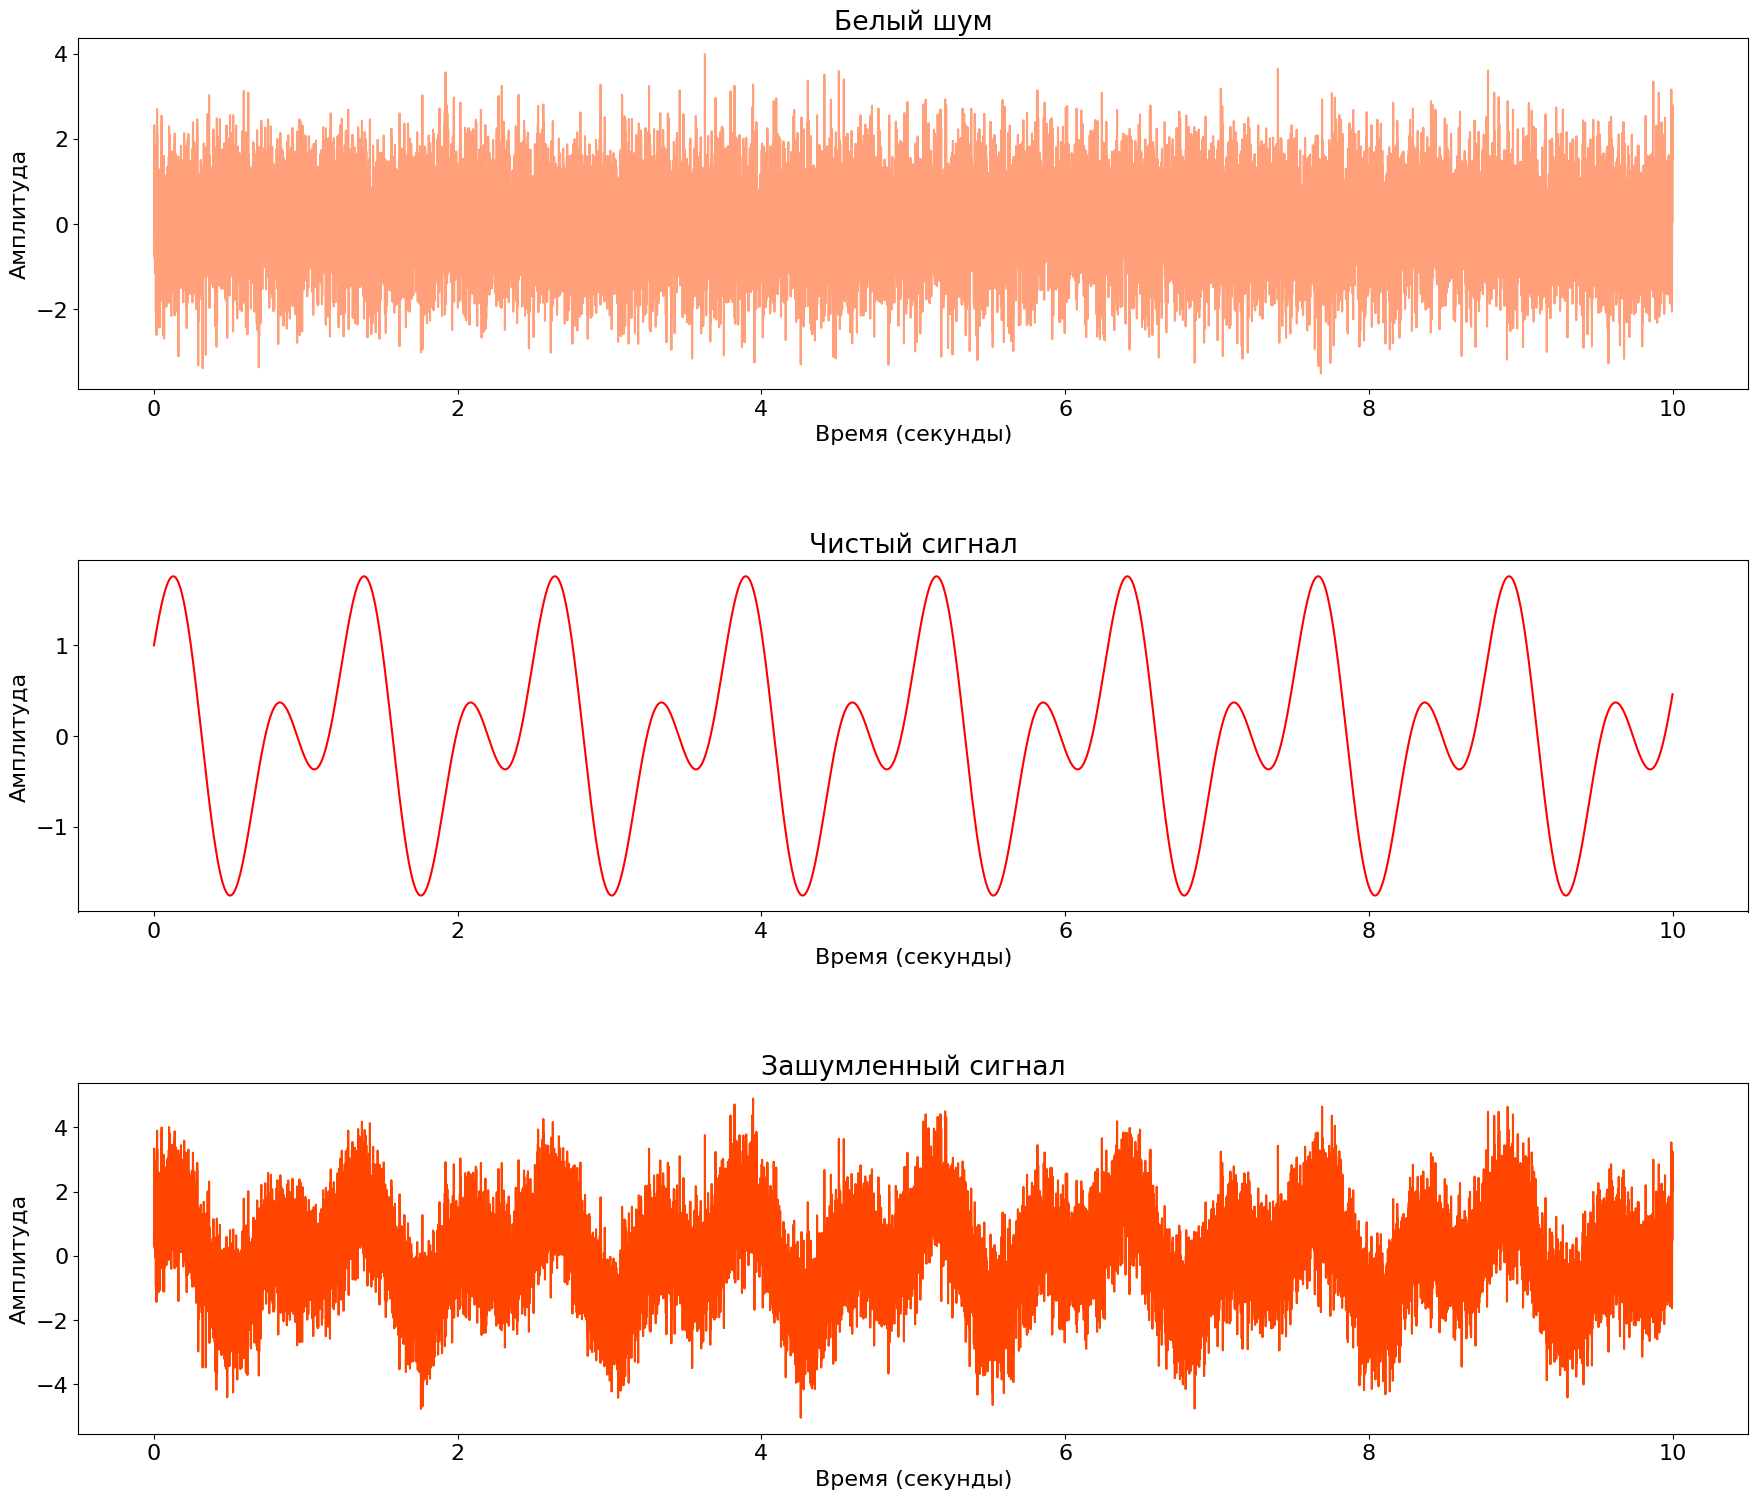

In [89]:
fig, axs = plt.subplots(3, 1, figsize=(20, 17)) 
fig.tight_layout(pad=6) 

axs[0].plot(time_axis, white_noise, color='lightsalmon')
axs[0].set_title('Белый шум')
axs[0].set_xlabel('Время (секунды)')
axs[0].set_ylabel('Амплитуда')

axs[1].plot(time_axis, clean_siglal, color='red')
axs[1].set_title('Чистый сигнал')
axs[1].set_xlabel('Время (секунды)')
axs[1].set_ylabel('Амплитуда')

axs[2].plot(time_axis, noiced_signal, color='orangered')
axs[2].set_title('Зашумленный сигнал')
axs[2].set_xlabel('Время (секунды)')
axs[2].set_ylabel('Амплитуда')